<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/Information_Quality_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Information Quality of Text

Dimensions:

1. Relevance
2. Consistency
3. Accuracy



#Gpt-2 Text Generator


In [1]:
!pip install -q gpt-2-simple
import gpt_2_simple as gpt2
from datetime import datetime
from google.colab import files


  Preparing metadata (setup.py) ... done


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


>
There are three released sizes of GPT-2:

124M (default): the "small" model, 500MB on disk.

355M: the "medium" model, 1.5GB on disk.

774M: the "large" model, cannot currently be finetuned with Colaboratory but can be used to generate text from the pretrained model (see later in Notebook)

1558M: the "extra large", true model. Will not work if a K80 GPU is attached to the notebook. (like 774M, it cannot be finetuned).


In [3]:
gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, 1.86Git/s]                                                     
Fetching encoder.json: 1.05Mit [00:00, 4.03Mit/s]
Fetching hparams.json: 1.05Mit [00:00, 2.85Git/s]                                                   
Fetching model.ckpt.data-00000-of-00001: 498Mit [00:10, 47.8Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 1.08Git/s]                                               
Fetching model.ckpt.meta: 1.05Mit [00:00, 5.69Mit/s]
Fetching vocab.bpe: 1.05Mit [00:00, 4.91Mit/s]


In [4]:
gpt2.mount_gdrive()

Mounted at /content/drive


In [5]:
file_name = "CleanedDatasetEntire1.txt"

In [6]:
gpt2.copy_file_from_gdrive(file_name)

In [7]:
import tensorflow as tf


AttributeError: ignored

In [ ]:
sess = gpt2.start_tf_sess()

gpt2.finetune(sess,
              dataset=file_name,
              model_name='124M',
              steps=10,
              restore_from='fresh',
              run_name='run1',
              print_every=10,
              sample_every=200,
              save_every=500,
              reuse=None,
              )

Loading checkpoint models/124M/model.ckpt
Loading dataset...


100%|██████████| 1/1 [00:00<00:00, 2866.92it/s]


dataset has 17233 tokens
Training...


In [10]:
gpt2.copy_checkpoint_to_gdrive(run_name='run1')

In [11]:
import tensorflow as tf
tf.compat.v1.reset_default_graph()

In [12]:
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, run_name='run1')

Loading checkpoint None


ValueError: ignored

In [ ]:
gpt2.generate(sess, run_name='run1')

Yes, the crime scene is open as of 9:30 p.m. CT.

Anyone with information regarding the crime is asked to contact Detective Brian Tucker at (408) 226-3871.

The investigation remains ongoing.

Contact:

Rotham Miller

community@games.com

(408) 863-8070

ajohnson@games.com<|endoftext|>The new Jurassic Park series is set for release on June 5, 2015, Disney said today.

The series was created by Fox, Disney's studio behind the animated series.

The series, which will premiere on January 12, 2015, is set to premiere on Disney XD starting June 5.

"Enjoy the action as Duke and Duke Rees face off against legendary foes in the first installment of the franchise," said Disney on its website. "With the complete series, we're setting up a strong foundation for an epic story that will help shape the future of Disney's beloved franchises."

The series will also premiere on Disney XD starting June 5, 2015.

"A new brand-new story about a mysterious character who learns about the world outside the 

In [ ]:
gpt2.generate(sess,
              length=250,
              temperature=0.7,
              prefix="LORD",
              nsamples=5,
              batch_size=5
              )

In [ ]:
gen_file = 'gpt2_gentext_{:%Y%m%d_%H%M%S}.txt'.format(datetime.utcnow())

gpt2.generate_to_file(sess,
                      destination_path=gen_file,
                      length=500,
                      temperature=0.7,
                      nsamples=100,
                      batch_size=20
                      )

In [ ]:
single_text = gpt2.generate(sess, return_as_list=True)
print((single_text))

['A former home secretary who fled London for Syria pleaded guilty to conspiring to supply arms and intelligence to Islamic State extremists in 2013.\n\nNatalie Geller, 54, was convicted of aiding and abetting an offence under the Terrorism Act 2003 in exchange for providing weapons and intelligence to the Islamic State in Iraq and the Levant (ISIL) in eastern Syria, according to the London crown corporation.\n\nGeller was arrested on 9 March 2015 when he fled Syria to Turkey after his home in Essex was raided. Bail was set at £20,000.\n\nHe was reported to have been working as a consultant on terrorism issues at the time of his arrest.\n\nGeller was charged with conspiracy to supply arms and intelligence to ISIL and encouraging ISIS to carry out attacks in the UK.\n\nHe was sentenced to five years\' concurrent community action for assisting a terrorist organisation and six months\' concurrent community action for conspiring to supply arms and intelligence to ISIL.\n\nThe Crown Prosecu

In [ ]:
import csv

with open('single_text.txt', 'w') as f:
	# using csv.writer method from CSV package
	write = csv.writer(f)
	write.writerow(single_text)



In [ ]:
import csv

# Open a CSV file for writing and write the text to it
with open('data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(single_text)

print("Data exported to data.csv successfully!")


Data exported to data.csv successfully!


#Evaluate Quality of Text:


KL-Divergence

The KL divergence between the two arrays is: 10.307499597944872


<ipython-input-78-f0cc50c9c2e6>:45: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1_array, hist=False, label='GPT-2 generated')
<ipython-input-78-f0cc50c9c2e6>:46: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2_array, hist=False, label='US-Census Entire Dataset')


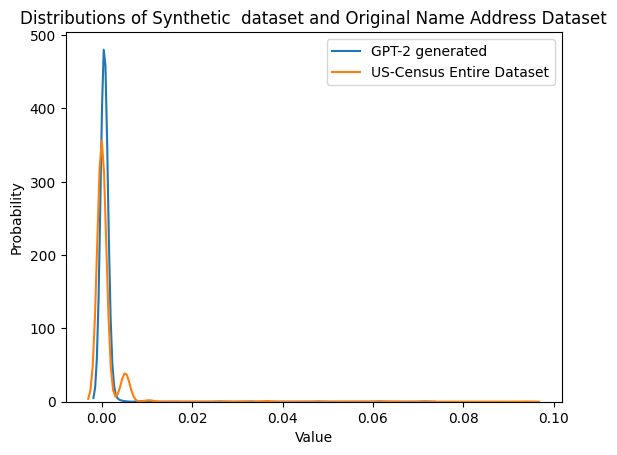

In [ ]:
import csv
import numpy as np
import seaborn as sns
from scipy.stats import entropy
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Read the data from the first CSV file
with open('/content/CleanedDatasetEntire1.txt', 'r') as file1:
    reader1 = csv.reader(file1)
    data1 = [row[0] for row in reader1]

# Read the data from the second CSV file
with open('/content/Cleaned_Simple_50.txt', 'r') as file2:
    reader2 = csv.reader(file2)
    data2 = [row[0] for row in reader2]

# Convert the strings into a vector representation
vectorizer = CountVectorizer()
data1_vector = vectorizer.fit_transform(data1)
data2_vector = vectorizer.transform(data2)

# Convert the vector representation into a numpy array
data1_array = data1_vector.toarray().sum(axis=0)
data2_array = data2_vector.toarray().sum(axis=0)

# Normalize the arrays
data1_array = data1_array / data1_array.sum()
data2_array = data2_array / data2_array.sum()

# Add a small constant to all elements
data1_array = data1_array + 1e-10
data2_array = data2_array + 1e-10

# Normalize the arrays again
data1_array = data1_array / data1_array.sum()
data2_array = data2_array / data2_array.sum()

# Calculate the KL divergence between the two arrays
kl_divergence = entropy(data1_array, data2_array)

print("The KL divergence between the two arrays is:", kl_divergence)

# Plot the arrays using seaborn
sns.distplot(data1_array, hist=False, label='GPT-2 generated')
sns.distplot(data2_array, hist=False, label='US-Census Entire Dataset')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Distributions of Synthetic  dataset and Original Name Address Dataset')
plt.legend()
plt.show()


#Cosine

In [ ]:
import math
import string
from collections import Counter

def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

def get_cosine_similarity(text1, text2):
    text1 = clean_text(text1)
    text2 = clean_text(text2)

    words1 = text1.split()
    words2 = text2.split()

    word_counts1 = Counter(words1)
    word_counts2 = Counter(words2)

    common_words = set(word_counts1.keys()) & set(word_counts2.keys())

    dot_product = sum(word_counts1[word] * word_counts2[word] for word in common_words)
    magnitude1 = math.sqrt(sum(word_counts1[word] ** 2 for word in word_counts1.keys()))
    magnitude2 = math.sqrt(sum(word_counts2[word] ** 2 for word in word_counts2.keys()))

    return dot_product / (magnitude1 * magnitude2)

text1 = read_file('CleanedDatasetEntire1.txt')
text2 = read_file('single_text.txt')

cosine_similarity = get_cosine_similarity(text1, text2)

print('Cosine Similarity between Synthetic dataset and original dataset:', cosine_similarity)


Cosine Similarity between Synthetic dataset and original dataset: 0.002624086948803878


#Levenshtein Distance

In [ ]:
!pip install python-Levenshtein


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.2 MB/s eta 0:00:00


In [ ]:
import Levenshtein

# Function to read the contents of a text file
def read_file(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        return file.read()

# Read the contents of the two files
file1_contents = read_file('CleanedDatasetEntire1.txt')
file2_contents = read_file('single_text.txt')

# Calculate the Levenshtein distance
distance = Levenshtein.distance(file1_contents, file2_contents)

# Print the result
print(f"Levenshtein distance between the two files: {distance}")

Levenshtein distance between the two files: 35597


#Kolmogorov-Smirnov

In [ ]:
from scipy.stats import ks_2samp

# Function to read the contents of a text file and calculate the word lengths
def calculate_word_lengths(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
        # Split the text into words and calculate word lengths
        word_lengths = [len(word) for word in text.split()]
        return word_lengths

# Read the contents of the two files and calculate word lengths
word_lengths1 = calculate_word_lengths('CleanedDatasetEntire1.txt')
word_lengths2 = calculate_word_lengths('single_text.txt')

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = ks_2samp(word_lengths1, word_lengths2)

# Print the result
print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

# Determine the result based on the p-value
if p_value < 0.05:
    print("The distributions are significantly different.")
else:
    print("The distributions are not significantly different.")


KS Statistic: 0.19654557741506168
P-Value: 2.478757928736684e-25
The distributions are significantly different.


#Pearson Correlation

In [ ]:
import collections
import math

# Function to read the contents of a text file and calculate word frequencies
def calculate_word_frequencies(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
        words = text.split()
        word_counts = collections.Counter(words)
        return word_counts

# Read the contents of the two files and calculate word frequencies
word_frequencies1 = calculate_word_frequencies('CleanedDatasetEntire1.txt')
word_frequencies2 = calculate_word_frequencies('single_text.txt')

# Create sets of unique words from both texts
unique_words = set(word_frequencies1.keys()).union(word_frequencies2.keys())

# Convert word frequencies to a common format, considering words that may be missing
word_counts1 = [word_frequencies1[word] if word in word_frequencies1 else 0 for word in unique_words]
word_counts2 = [word_frequencies2[word] if word in word_frequencies2 else 0 for word in unique_words]

# Calculate the Pearson correlation
def pearson_correlation(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x_squared = sum(xi ** 2 for xi in x)
    sum_y_squared = sum(yi ** 2 for yi in y)
    product_sum = sum(xi * yi for xi, yi in zip(x, y))
    numerator = product_sum - (sum_x * sum_y / n)
    denominator = math.sqrt((sum_x_squared - (sum_x ** 2 / n)) * (sum_y_squared - (sum_y ** 2 / n)))
    if denominator == 0:
        return 0  # To handle the case where the denominator is zero
    else:
        return numerator / denominator

correlation = pearson_correlation(word_counts1, word_counts2)

# Print the Pearson correlation coefficient
print(f"Pearson Correlation: {correlation}")


Pearson Correlation: -0.02636892178042349


#Jaccard Distance

In [ ]:
# Function to read the contents of a text file and tokenize it
def tokenize_text(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
        # Tokenize the text by splitting it into words (you can use more advanced tokenization methods if needed)
        tokens = set(text.split())
        return tokens

# Read the contents of the two files and tokenize them
tokens1 = tokenize_text('CleanedDatasetEntire1.txt')
tokens2 = tokenize_text('single_text.txt')

# Calculate the Jaccard similarity
intersection = len(tokens1.intersection(tokens2))
union = len(tokens1.union(tokens2))

jaccard_similarity = intersection / union

# Print the Jaccard similarity
print(f"Jaccard Similarity: {jaccard_similarity:.2f}")


Jaccard Similarity: 0.00


# Jaccard Similiarity

In [ ]:
# Function to read the contents of a text file and tokenize it
def tokenize_text(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
        # Tokenize the text by splitting it into words (you can use more advanced tokenization methods if needed)
        tokens = set(text.split())
        return tokens

# Read the contents of the two files and tokenize them
tokens1 = tokenize_text('CleanedDatasetEntire1.txt')
tokens2 = tokenize_text('single_text.txt')

# Calculate the Jaccard distance
intersection = len(tokens1.intersection(tokens2))
union = len(tokens1.union(tokens2))

jaccard_similarity = intersection / union
jaccard_distance = 1 - jaccard_similarity

# Print the Jaccard distance
print(f"Jaccard Distance: {jaccard_distance:.2f}")


Jaccard Distance: 1.00


In [ ]:
!pip install gensim

#Word Embedding Similarity

In [ ]:
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

2023-10-27 22:45:48.402884: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-27 22:45:48.402943: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-27 22:45:48.402984: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-27 22:45:49.535676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
2023-10-27 22:46:22.561172: E tensorflow/compiler/xla/s

In [ ]:
import spacy

# Load the spaCy model with word vectors (you can use other models as well)
nlp = spacy.load("en_core_web_sm")

# Read the contents of "CleanedDatasetEntire1.txt" and "single_text.txt"
with open("CleanedDatasetEntire1.txt", "r", encoding="utf-8") as file:
    text1 = file.read()

with open("single_text.txt", "r", encoding="utf-8") as file:
    text2 = file.read()

# Process the text with spaCy
doc1 = nlp(text1)
doc2 = nlp(text2)

# Calculate the similarity between the two documents (cosine similarity)
similarity = doc1.similarity(doc2)

print(f"Word Embedding Similarity: {similarity:.2f}")


Word Embedding Similarity: 0.30


<ipython-input-45-6c2ad36c846d>:18: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


#BLEU SCORE

In [ ]:
!pip install nltk


In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu

# Read the contents of "CleanedDatasetEntire1.txt" and "single_text.txt"
with open("CleanedDatasetEntire1.txt", "r", encoding="utf-8") as file:
    reference_text = file.read()

with open("single_text.txt", "r", encoding="utf-8") as file:
    candidate_text = file.read()

# Tokenize the reference and candidate texts
reference_tokens = nltk.word_tokenize(reference_text)
candidate_tokens = nltk.word_tokenize(candidate_text)

# Calculate the BLEU Score
bleu_score = sentence_bleu([reference_tokens], candidate_tokens)

print(f"BLEU Score: {bleu_score:.2f}")


BLEU Score: 0.00


#Precision, Recall, F-1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the contents of "CleanedDatasetEntire1.txt" and "single_text.txt"
with open("CleanedDatasetEntire1.txt", "r", encoding="utf-8") as file:
    text1 = file.read()

with open("single_text.txt", "r", encoding="utf-8") as file:
    text2 = file.read()

# Assuming you have binary labels (0 for incorrect, 1 for correct) for both texts
labels1 = [1, 0]  # Replace with the actual labels for "CleanedDatasetEntire1.txt"
labels2 = [1, 1]  # Replace with the actual labels for "single_text.txt"

# Calculate the F1 score, accuracy, precision, and recall
f1 = f1_score(labels1, labels2)
accuracy = accuracy_score(labels1, labels2)
precision = precision_score(labels1, labels2)
recall = recall_score(labels1, labels2)

print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


F1 Score: 0.67
Accuracy: 0.50
Precision: 0.50
Recall: 1.00


#

#LSTM Synthetic dataset

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# 1. Preprocess the data
with open("CleanedDatasetEntire1.txt", "r") as file:
    text = file.read()

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1

# Convert text to sequences of integers
sequences = []
for line in text.split("\n"):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequences.append(encoded[:i+1])

# Pad sequences for consistent length
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# Split sequences into input and output elements
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

# 2. Create an LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_length-1))
model.add(LSTM(100))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Train the model
model.fit(X, y, epochs=20, verbose=2)

# 4. Generate synthetic data
def generate_text(seed_text, model, max_length, num_words):
    output_text = seed_text
    for _ in range(num_words):
        encoded = tokenizer.texts_to_sequences([seed_text])[0]
        encoded = pad_sequences([encoded], maxlen=max_length-1, padding='pre')
        prediction = np.argmax(model.predict(encoded), axis=-1)
        predicted_word = ""
        for word, index in tokenizer.word_index.items():
            if index == prediction:
                predicted_word = word
                break
        seed_text += " " + predicted_word
        output_text += " " + predicted_word
    return output_text

# Generate new text based on a seed
seed = "This is a"
synthetic_data = generate_text(seed, model, max_length, 500)  # Generating 500 words

# Save synthetic data to file
with open("LSTMtraining.txt", "w") as output_file:
    output_file.write(synthetic_data)

print("Synthetic data saved to LSTMtraining.txt!")


Train on 6036 samples
Epoch 1/20
6036/6036 - 4s - loss: 6.9711 - accuracy: 0.0389 - 4s/epoch - 676us/sample
Epoch 2/20
6036/6036 - 4s - loss: 6.0570 - accuracy: 0.0570 - 4s/epoch - 685us/sample
Epoch 3/20
6036/6036 - 4s - loss: 5.5635 - accuracy: 0.1120 - 4s/epoch - 699us/sample
Epoch 4/20
6036/6036 - 3s - loss: 5.1630 - accuracy: 0.1445 - 3s/epoch - 574us/sample
Epoch 5/20
6036/6036 - 4s - loss: 4.9143 - accuracy: 0.1589 - 4s/epoch - 587us/sample
Epoch 6/20
6036/6036 - 5s - loss: 4.7216 - accuracy: 0.1561 - 5s/epoch - 808us/sample
Epoch 7/20
6036/6036 - 4s - loss: 4.5643 - accuracy: 0.1675 - 4s/epoch - 591us/sample
Epoch 8/20
6036/6036 - 4s - loss: 4.4288 - accuracy: 0.1718 - 4s/epoch - 585us/sample
Epoch 9/20
6036/6036 - 4s - loss: 4.3115 - accuracy: 0.2069 - 4s/epoch - 669us/sample
Epoch 10/20
6036/6036 - 5s - loss: 4.1996 - accuracy: 0.2238 - 5s/epoch - 746us/sample
Epoch 11/20
6036/6036 - 3s - loss: 4.0976 - accuracy: 0.2399 - 3s/epoch - 577us/sample
Epoch 12/20
6036/6036 - 3s - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Synthetic data saved to LSTMtraining.txt!


#BART_Training

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.4 MB/s eta 0:00:00


ERROR: Could not find a version that satisfies the requirement leakgan (from versions: none)
ERROR: No matching distribution found for leakgan


In [ ]:
from transformers import GPTJForCausalLM, GPT2Tokenizer
import torch

# Load the model and tokenizer
model_name = "EleutherAI/gpt-j-6B"
model = GPTJForCausalLM.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Load the input data
with open("CleanedDatasetEntire1.txt", "r") as file:
    data = file.read()

# Tokenize the input data
input_ids = tokenizer.encode(data, return_tensors="pt")

# Generate synthetic data
output = model.generate(input_ids, max_length=1000, num_return_sequences=5, pad_token_id=tokenizer.eos_token_id)

# Decode and save the generated data
with open("GPT-Jtraining.txt", "w") as file:
    for item in output:
        file.write(tokenizer.decode(item, skip_special_tokens=True) + "\n\n")

print("Synthetic data saved to GPT-Jtraining.txt")


KeyboardInterrupt: ignored